<a href="https://colab.research.google.com/github/MainakRepositor/Data-Analysis/blob/master/Heart_Attack_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Attack Prediction

<hr>

In [1]:
!pip install -U ppscore

  Created wheel for ppscore: filename=ppscore-1.1.1-py2.py3-none-any.whl size=12987 sha256=5913e4f02e75887baa63b6adfb1b25e439ee5ca611a92902858aec5873ee6f79
  Stored in directory: /root/.cache/pip/wheels/3a/16/cb/4768ae3fd9f02af8cd6d880b9095281cc62bb1748fac67fdc4
Successfully built ppscore


## 1. Importing necessary packages

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import ppscore as pps
plt.style.use("fivethirtyeight")
plt.rcParams['figure.figsize'] = 19,7
print("Necessary packages have been included successfully!")

Necessary packages have been included successfully!


## 2. Importing necessary datasets

In [3]:
url = 'https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/heart_failure_clinical_records_dataset.csv'
data = pd.read_csv(url,error_bad_lines=False)
data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [5]:
r,c = data.shape
print("Number of data entries = ",r)
print("Number of parameter    = ",c)

Number of data entries =  299
Number of parameter    =  13


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [8]:
data.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Text(0.5, 1.0, 'Age distribution of patients \n')

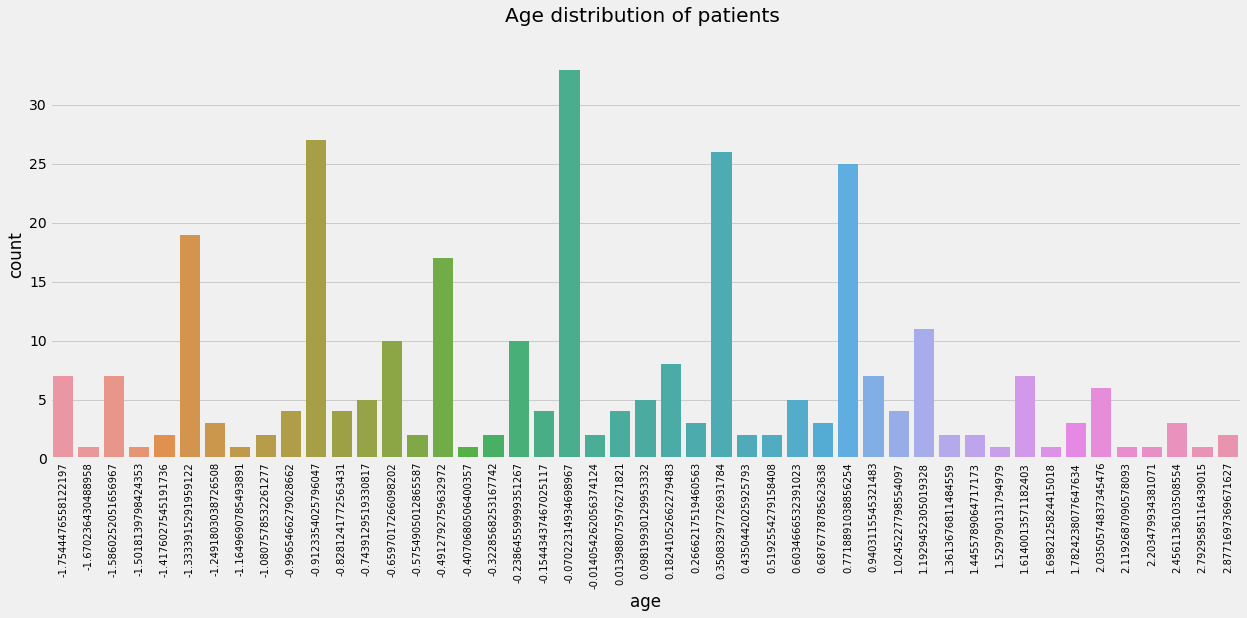

In [39]:
sns.countplot(data=data,x=data['age'])
plt.xticks(rotation=90,size=10)
plt.title("Age distribution of patients \n")

In [50]:
data['sex'].value_counts()

1    194
0    105
Name: sex, dtype: int64

1 --> Male : 194
0 --> Female : 105


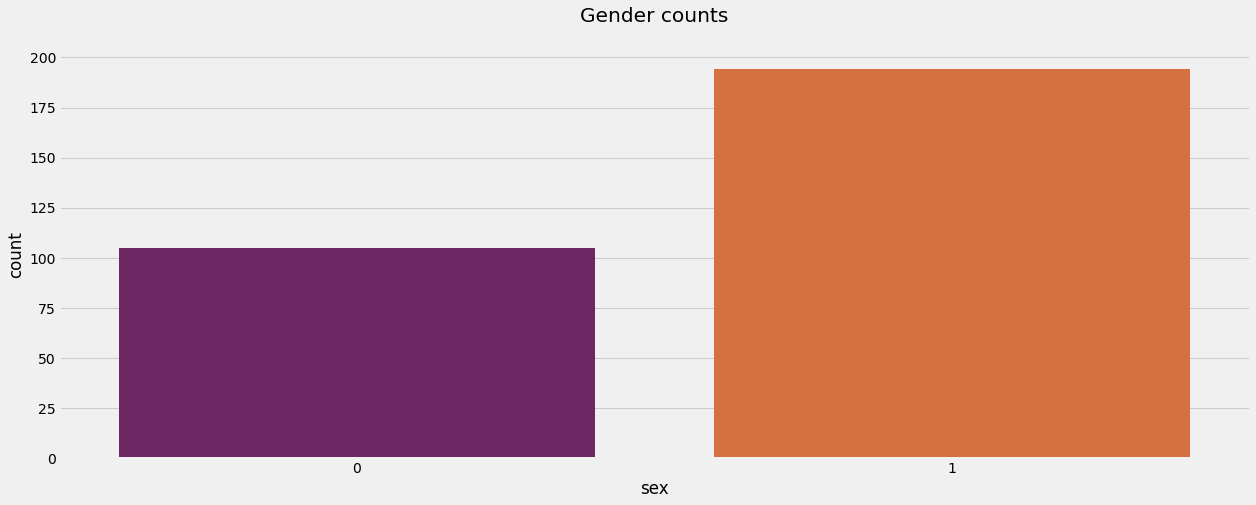

In [51]:
sns.countplot(data=data,x='sex',palette='inferno')
plt.title("Gender counts\n")
print("1 --> Male : 194")
print("0 --> Female : 105")
plt.show()

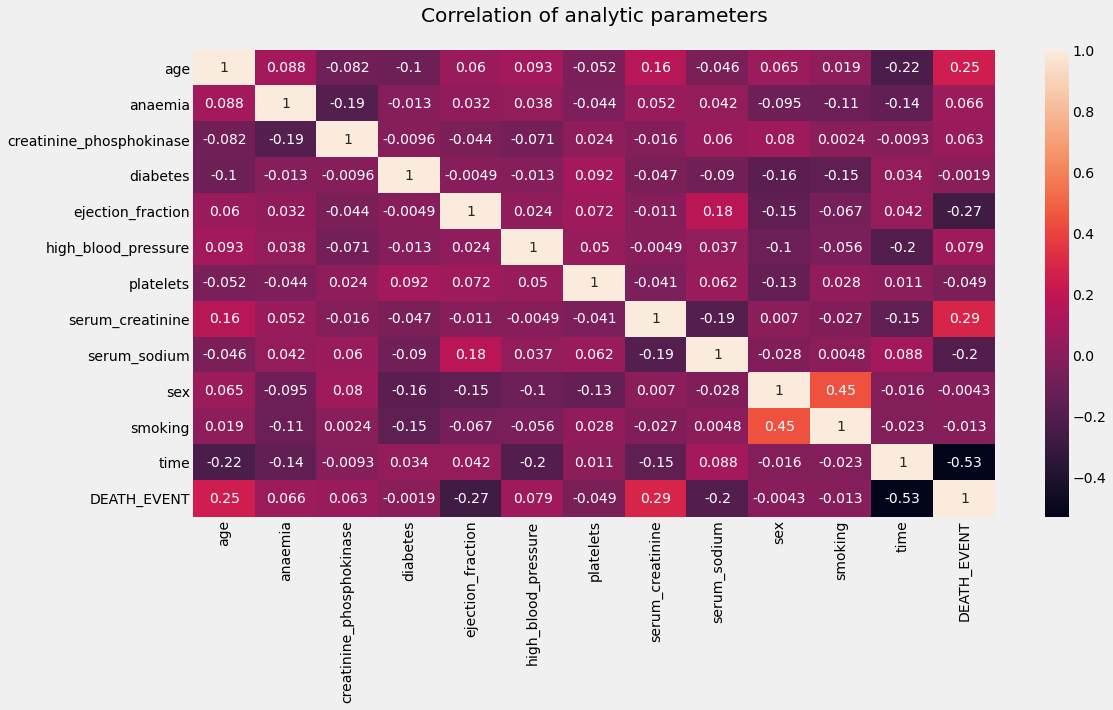

In [35]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(),annot=True)
plt.title('Correlation of analytic parameters\n')
plt.show()

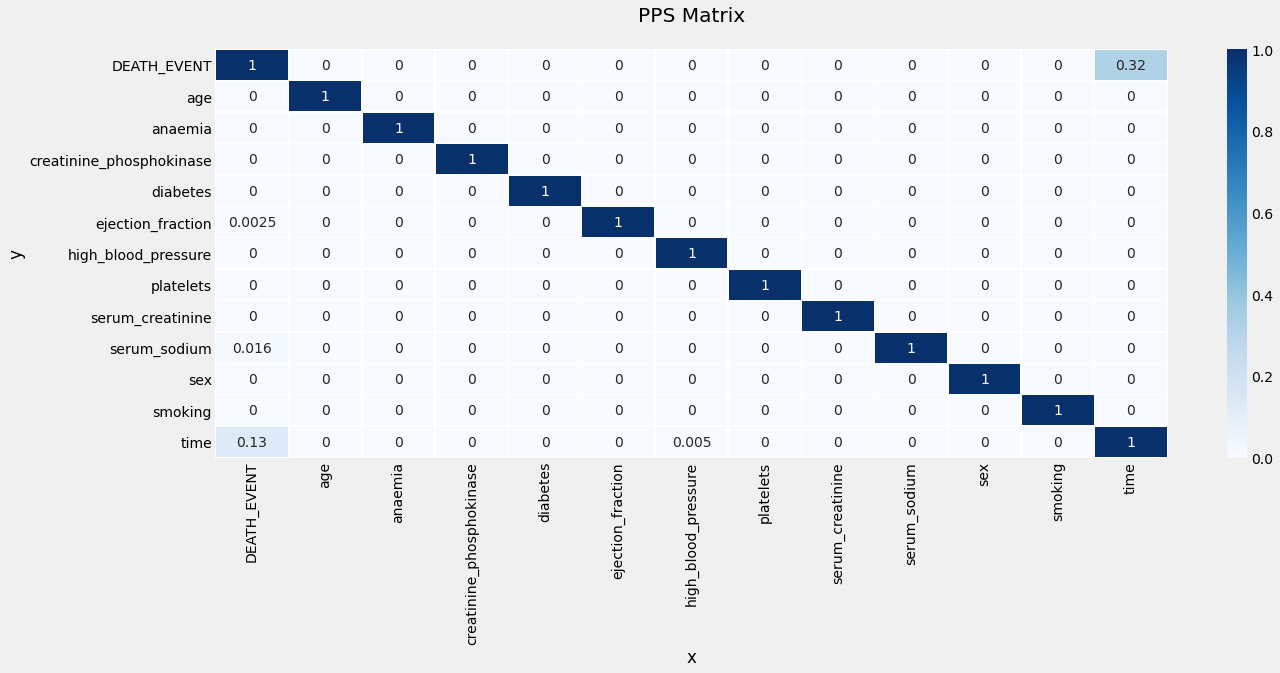

In [36]:
matrix_df = pps.matrix(data)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
plt.title('PPS Matrix\n')
plt.show()

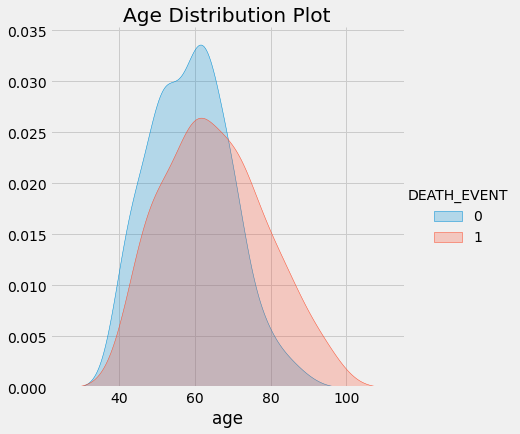

In [15]:
sns.FacetGrid(data, hue="DEATH_EVENT", height=6).map(sns.kdeplot, "age",shade=True).add_legend()
plt.title('Age Distribution Plot')
plt.show()

0 --> Negative
1 --> Positive


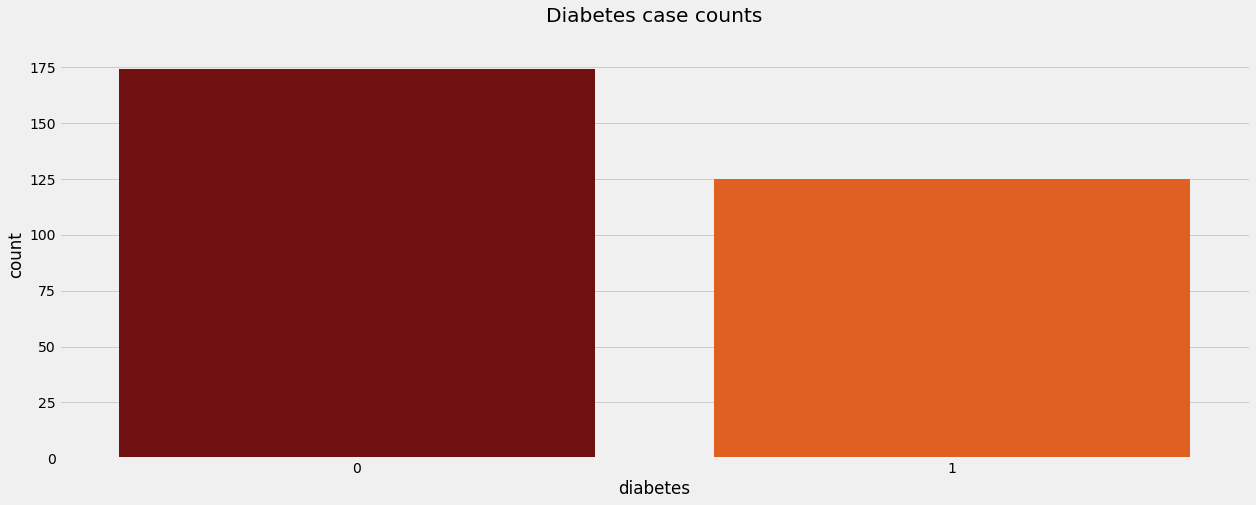

In [54]:
sns.countplot(data=data,x='diabetes',palette='gist_heat')
plt.title("Diabetes case counts\n")
print("0 --> Negative")
print("1 --> Positive")
plt.show()

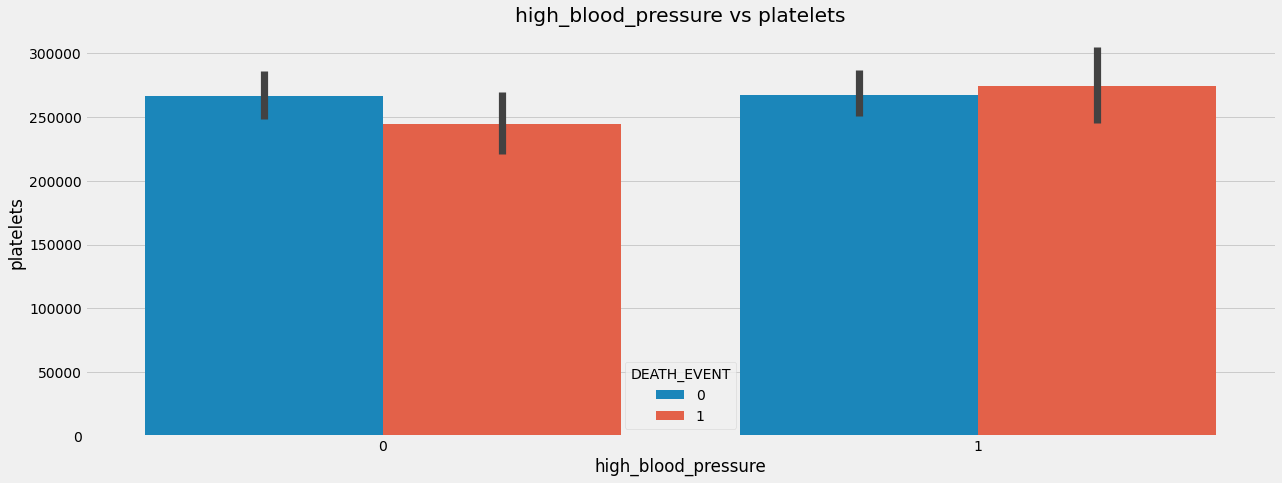

In [20]:
sns.barplot(data=data, x='high_blood_pressure', y='platelets', hue='DEATH_EVENT')
plt.title('high_blood_pressure vs platelets')
plt.show()

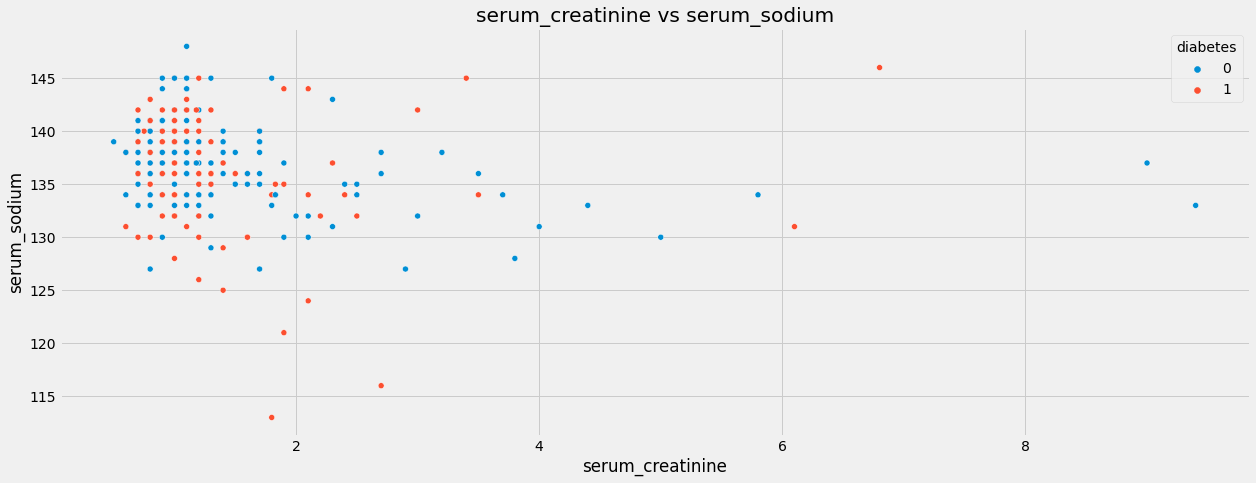

In [21]:
sns.scatterplot(data=data, x='serum_creatinine', y='serum_sodium', hue='diabetes')
plt.title('serum_creatinine vs serum_sodium')
plt.show()

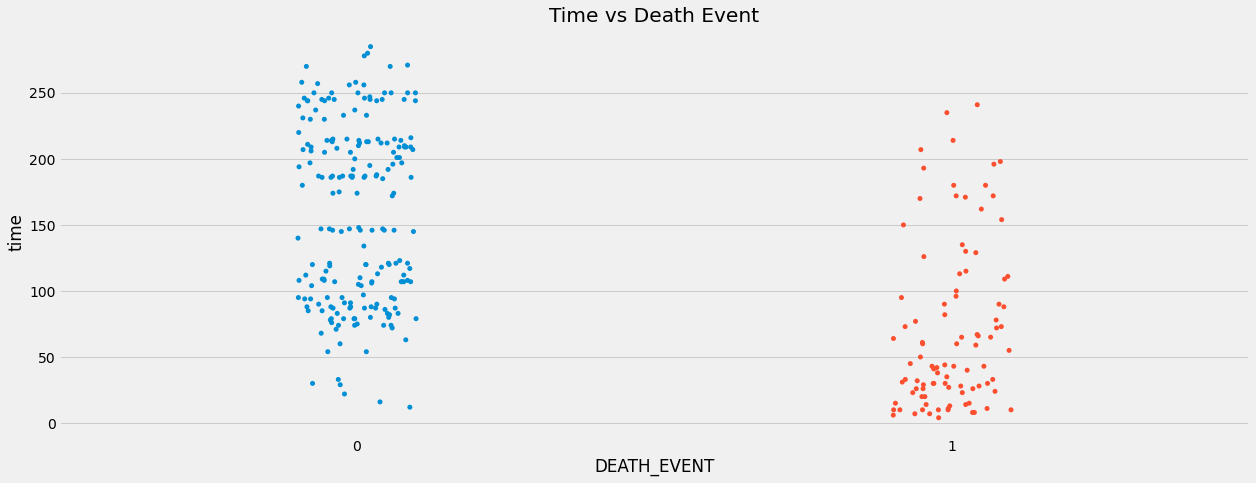

In [22]:
sns.stripplot(data=data, x="DEATH_EVENT", y="time")
plt.title('Time vs Death Event')
plt.show()

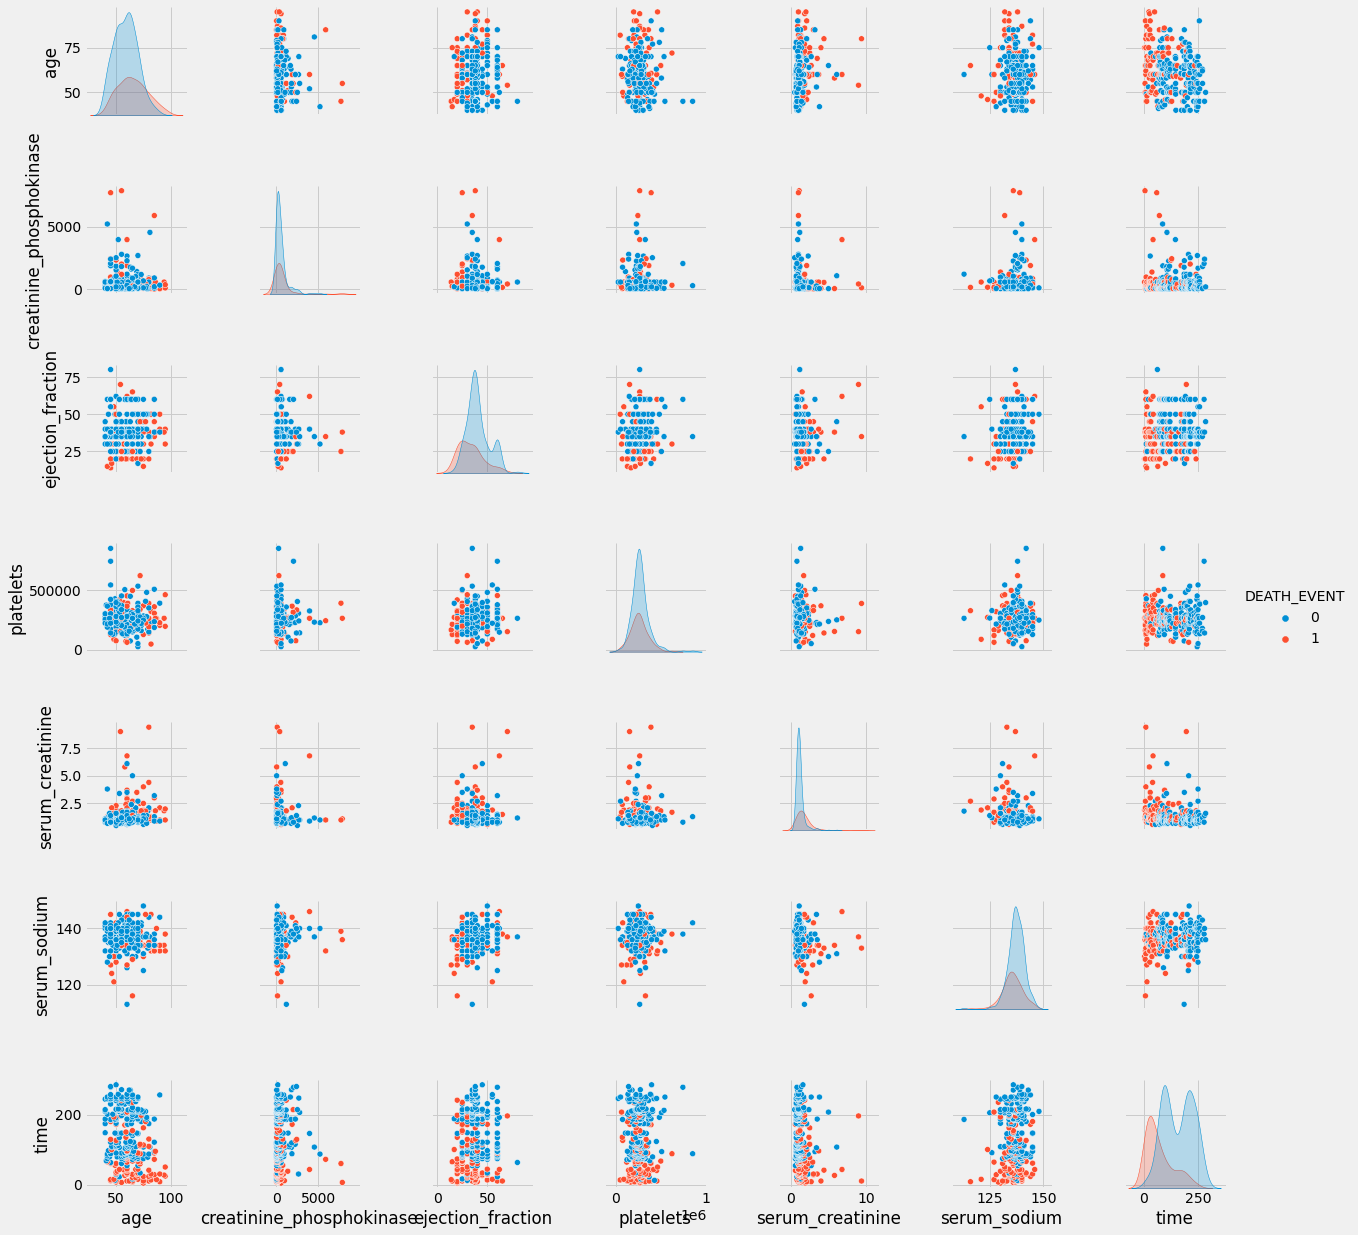

In [23]:
sns.pairplot(data=data[['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time','DEATH_EVENT']], hue='DEATH_EVENT')

In [24]:
from sklearn.preprocessing import StandardScaler

cols = ['age','creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
scaler = StandardScaler()
data[cols] = scaler.fit_transform(data[cols])

In [25]:
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT'].copy()
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=13)

In [26]:
from sklearn.metrics import roc_curve,accuracy_score,plot_confusion_matrix

In [27]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(min_samples_split=2, class_weight={0:2,1:7}, random_state=13)
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree Classifier is', accuracy_score(prediction,test_y))

The accuracy of the Decision Tree Classifier is 0.84


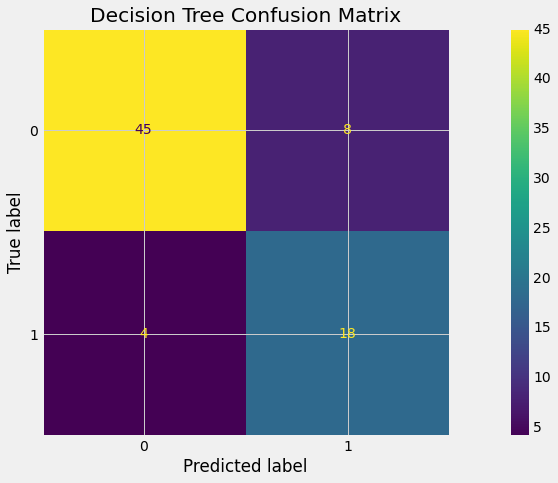

In [28]:
plot_confusion_matrix(model, test_X, test_y)
plt.title('Decision Tree Confusion Matrix')
plt.show()

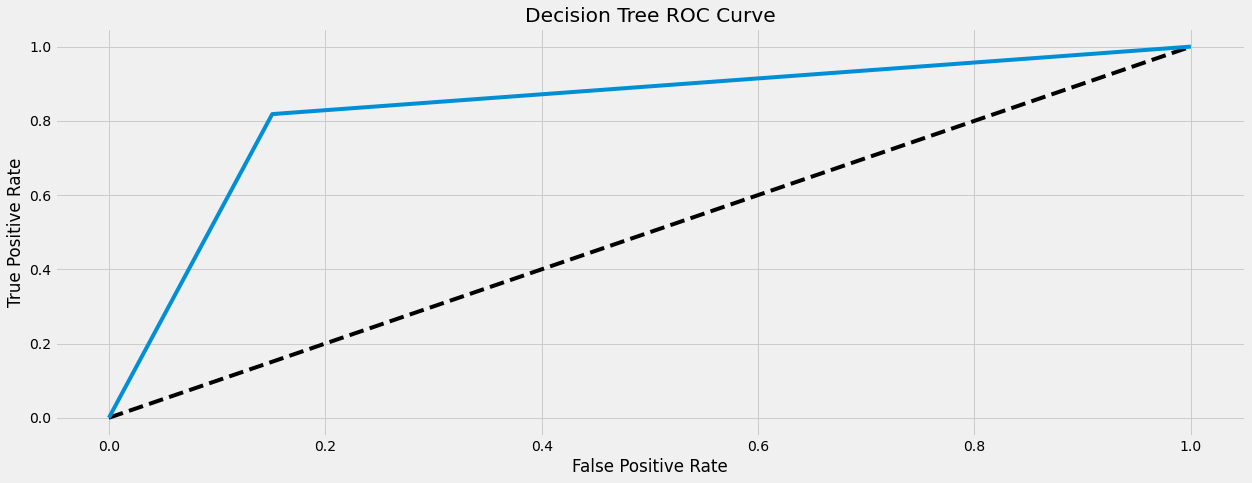

In [29]:
model = DecisionTreeClassifier(min_samples_split=2, class_weight={0:2,1:7}, random_state=13)
model.fit(train_X, train_y)
y_pred_prob = model.predict_proba(test_X)[:,1]
fpr, tpr, thresholds = roc_curve(test_y, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='DT')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.show()

In [30]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(min_samples_split=2, class_weight={0:2,1:7}, random_state=13)
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Random Forest Classifier is', accuracy_score(prediction,test_y))

The accuracy of the Random Forest Classifier is 0.8933333333333333


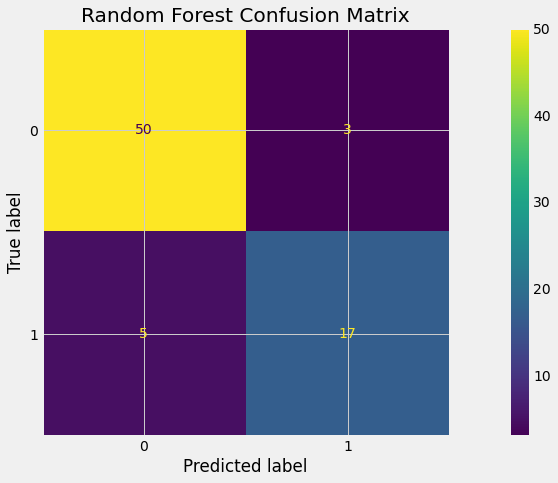

In [31]:
plot_confusion_matrix(model, test_X, test_y)
plt.title('Random Forest Confusion Matrix')
plt.show()

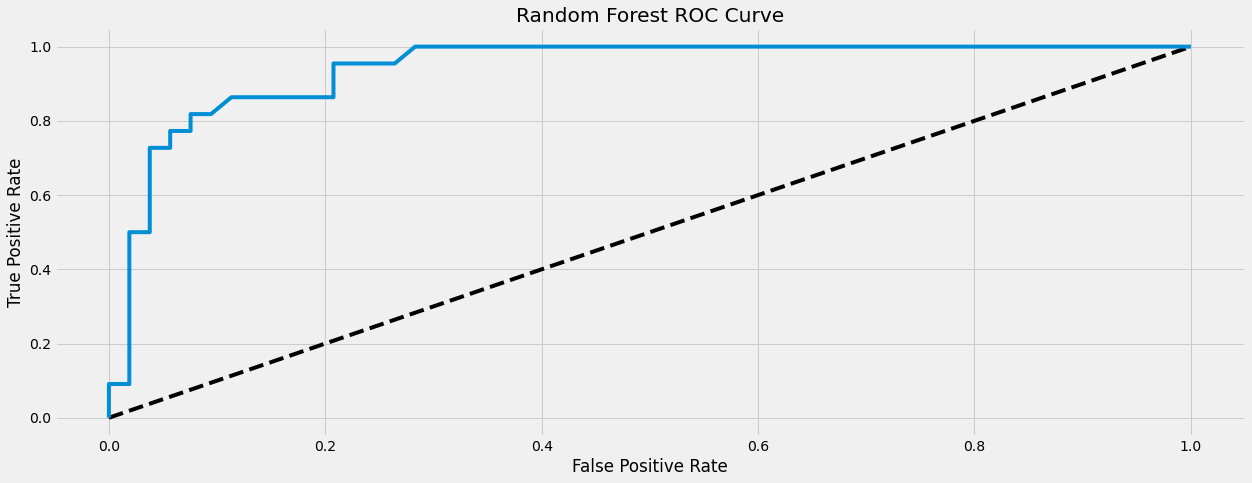

In [32]:
model = RandomForestClassifier(min_samples_split=2, class_weight={0:2,1:7}, random_state=13)
model.fit(train_X, train_y)
y_pred_prob = model.predict_proba(test_X)[:,1]
fpr, tpr, thresholds = roc_curve(test_y, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='RF')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()

##Comparison of models
### Random Forest provides a better accuracy(89.3%) than decision trees
## RF is more efficient in prediction the negative labels in the data as can be seen from the confusion matrices of the two models
### ROC score of RF is much better than DT

## Conclusion
### Do you fear a heart attack? Then obviouly make use of random forest. Also in case this notebook gave some hint on using the model, do leave a heart here.